In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
dataO = pd.read_csv('WESAD_Oversample.csv')

In [ ]:
dataO

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,55.000000,-32.0,44.0,30.520000,1.634132,35.810000,0.0
1,49.000000,-21.0,30.0,52.540000,1.614912,35.810000,0.0
2,52.000000,-22.0,27.0,94.310000,1.591848,35.810000,0.0
3,58.000000,-14.0,28.0,-38.860000,1.558534,35.810000,0.0
4,42.000000,-17.0,42.0,-89.820000,1.561096,35.810000,0.0
...,...,...,...,...,...,...,...
334631,52.000000,9.0,-35.0,46.729841,0.781364,35.346593,2.0
334632,61.000000,-14.0,8.0,-6.156408,4.576977,29.981845,2.0
334633,20.000000,61.0,1.0,13.437188,0.391537,34.030000,2.0
334634,24.000000,0.0,58.0,-23.339715,5.041989,34.802784,2.0


In [ ]:
dataO.describe()

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
count,334636.000000,334636.000000,334636.000000,334636.000000,334636.000000,334636.000000,334636.000000
mean,17.145341,-1.632334,12.754596,0.512203,1.750976,32.918935,1.491310
std,45.297126,26.718691,28.676230,37.371348,1.940880,1.479666,1.119292
min,-111.222184,-79.000000,-72.569358,-187.970000,0.074584,28.990000,0.000000
25%,-31.000000,-17.000000,-6.000000,-12.704709,0.325196,31.930649,0.000000
50%,35.000000,-0.408712,12.928018,2.097088,0.820138,33.070000,1.000000
75%,57.000000,13.014758,36.000000,14.450000,2.869779,34.000000,2.000000
max,127.000000,76.506430,97.000000,187.964005,8.890202,35.970000,3.000000


In [ ]:
dataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334636 entries, 0 to 334635
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ACC_0   334636 non-null  float64
 1   ACC_1   334636 non-null  float64
 2   ACC_2   334636 non-null  float64
 3   BVP     334636 non-null  float64
 4   EDA     334636 non-null  float64
 5   TEMP    334636 non-null  float64
 6   labels  334636 non-null  float64
dtypes: float64(7)
memory usage: 17.9 MB


NORMALIZE

In [ ]:
X = dataO.drop(columns=['labels'])
y = dataO['labels']

In [ ]:
import pandas as pd
import numpy as np

def normalize_data(X):
    return (X - np.mean(X)) / np.std(X)

def denormalize_data(normalized_data, original_data):
    return normalized_data * np.std(original_data) + np.mean(original_data)

X = normalize_data(X)

In [ ]:
denormalized_data = denormalize_data(X, dataO.drop(columns=['labels']))

In [ ]:
X

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP
0,0.980749,-1.593454,1.165603,0.533700,-4.606589,17.054584
1,0.848290,-1.181757,0.677393,1.122922,-4.616492,17.054584
2,0.914520,-1.219184,0.572777,2.240625,-4.628375,17.054584
3,1.046979,-0.919768,0.607649,-1.322806,-4.645539,17.054584
4,0.693755,-1.032049,1.095859,-2.686419,-4.644219,17.054584
...,...,...,...,...,...,...
334631,0.914520,-0.058946,-1.589296,0.967451,-5.045962,16.741400
334632,1.113208,-0.919768,-0.089794,-0.447706,-3.090344,13.115746
334633,0.208072,1.887260,-0.333899,0.076589,-5.246812,15.851608
334634,0.296378,-0.395789,1.653813,-0.907506,-2.850755,16.373878


In [ ]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
334631    2.0
334632    2.0
334633    2.0
334634    2.0
334635    2.0
Name: labels, Length: 334636, dtype: float64

In [ ]:
y.value_counts()

labels
1.0    85160
0.0    84289
3.0    83512
2.0    81675
Name: count, dtype: int64

In [ ]:
# testovacia sada 8/2
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# trénovacia sada / validačná sada . 8/2
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

EVALVACIA

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier(),
    'GBT': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

#evalvácia
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

best_model = max(results, key=results.get)
print(f'Best Model: {best_model}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.3897920153000239
Decision Tree Accuracy: 0.9836540760219938
Random Forest Accuracy: 0.9896007650011953
k-NN Accuracy: 0.9616602916567057
GBT Accuracy: 0.8895380109968922
XGBoost Accuracy: 0.9814278030121922
Best Model: Random Forest


In [ ]:
from sklearn.metrics import classification_report

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{model_name} Classification Report:\n{report}')

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     33814
         1.0       0.99      0.99      0.99     33744
         2.0       1.00      0.99      1.00     32768
         3.0       0.99      1.00      1.00     33384

    accuracy                           0.99    133710
   macro avg       0.99      0.99      0.99    133710
weighted avg       0.99      0.99      0.99    133710

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33814
         1.0       1.00      1.00      1.00     33744
         2.0       1.00      1.00      1.00     32768
         3.0       1.00      1.00      1.00     33384

    accuracy                           1.00    133710
   macro avg       1.00      1.00      1.00    133710
weighted avg       1.00      1.00      1.00    133710

XGBoost Classification Report:
              precision  

Hyperparametre

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_classifier = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

accuracy = random_search.score(X_test, y_test)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'max_depth': 31, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76}
Accuracy: 0.9992960598638406


TRÉNOVANIE

In [ ]:
best_params = {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 178}
best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

# Ténovacia sada
train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# validačná sada
val_predictions = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# kontrola overfitting
if train_accuracy > val_accuracy:
    print("Pozor, Overfitting")
else:
    print("žiadny overfitting")

Training Accuracy: 0.9998705056753378
Validation Accuracy: 0.9889581185470737
Pozor, Overfitting


In [ ]:
best_params = {'class_weight': 'balanced', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 178}

best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

# trénvoacia sada
train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# validačná sada
val_predictions = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# krížovaá validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# kontrola overfittingu
if np.mean(cv_scores) < val_accuracy:
    print("Pozor, Overfitting !")
else:
    print("žiadny overfitting.")

Training Accuracy: 0.9837235595001519
Validation Accuracy: 0.9780805952754493
Cross-Validation Scores: [0.97748892 0.9774878  0.97888236 0.97858352 0.97589401 0.97549557
 0.97499751 0.9783843  0.97674071 0.97619285]
Mean CV Accuracy: 0.9770147550108638
Pozor, Overfitting !


In [ ]:
best_params = {'class_weight': 'balanced', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 178}

best_model = RandomForestClassifier(**best_params)

# krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

# najlepšie premenné
feature_importances = best_model.feature_importances_
print("Feature Importances:", feature_importances)
sfm = SelectFromModel(best_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

best_model.fit(X_train_selected, y_train)

# testovacia sada
X_test_selected = sfm.transform(X_test)
y_pred = best_model.predict(X_test_selected)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.97694108 0.97708935 0.97733838 0.9792808  0.97808547 0.97380217
 0.97484809 0.97713916 0.97773683 0.97634227]
Mean CV Accuracy: 0.9768603598910113
Feature Importances: [0.14299612 0.15115734 0.13696391 0.0047828  0.27459285 0.28950698]
Test Accuracy: 0.9663967248386326


In [ ]:
print("X_train_selected shape:", X_train_selected.shape)
print("Feature importances shape:", feature_importances.shape)

X_train_selected shape: (200781, 3)
Feature importances shape: (6,)


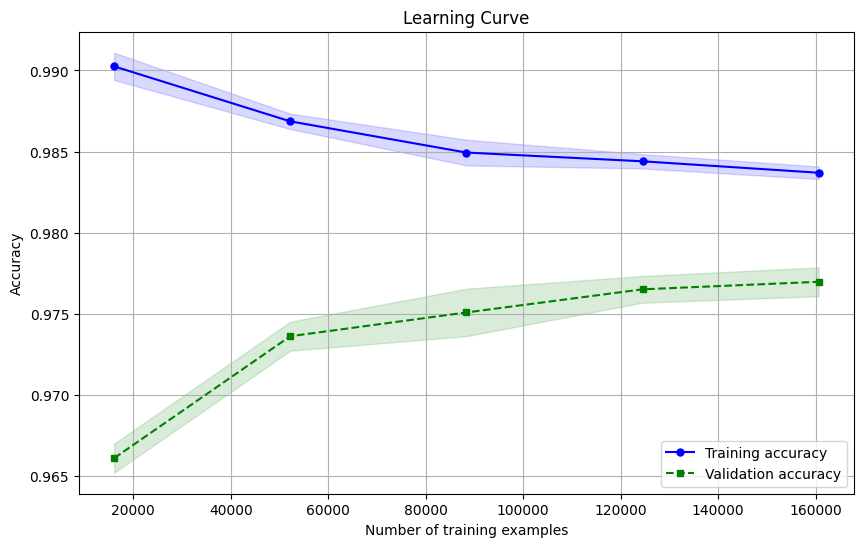

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

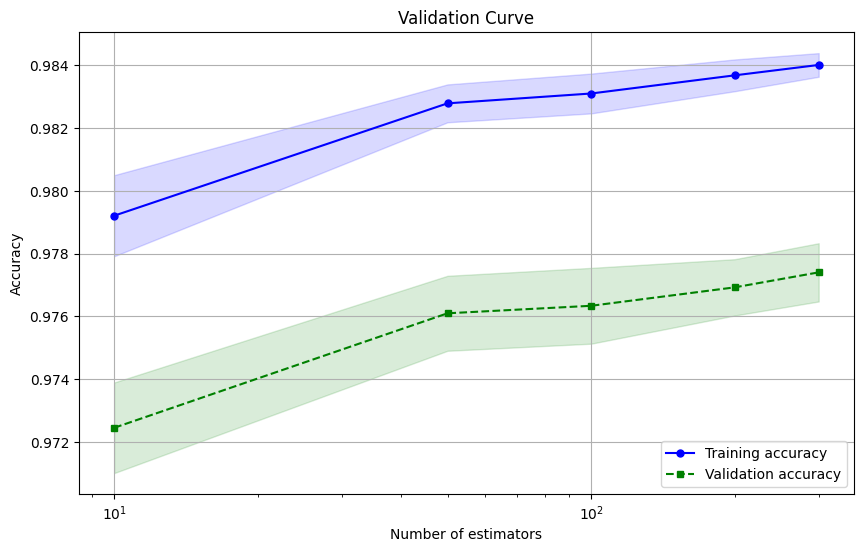

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

param_range = [10, 50, 100, 200, 300]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(**best_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.show()

In [ ]:
X_train_selected

array([[-1.14432998, -5.07931436, 15.44611042],
       [ 1.88726024, -4.35547908, 14.64863185],
       [-0.24608103, -4.9955084 , 14.67566502],
       ...,
       [-0.13379991, -2.14207266, 16.39227144],
       [-0.99462182, -3.22483633, 15.22179204],
       [ 0.05333529, -5.17950617, 14.18906793]])

In [ ]:
X_train

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP
292310,-1.602154,-1.144330,-0.682547,-0.703683,-5.079314,15.446110
32871,-0.564605,1.887260,0.049694,0.880758,-4.355479,14.648632
172477,-1.072364,-0.246081,1.409708,-0.447267,-4.995508,14.675665
319972,1.091131,-1.032049,-0.124666,-0.095367,-3.207473,15.230031
102708,1.135284,-0.246081,-0.682621,-0.213398,-4.903320,14.405333
...,...,...,...,...,...,...
270694,1.135284,0.053335,-0.473388,-0.574857,-5.039482,16.657768
45771,-0.719141,1.438136,0.782009,-0.055523,-4.131085,14.094452
117334,0.936596,-0.133800,0.747137,0.008430,-2.142073,16.392271
290345,1.091131,-0.994622,-0.159538,-0.488419,-3.224836,15.221792


In [ ]:
X_test=X_test.drop(columns=['ACC_0'])
X_test=X_test.drop(columns=['ACC_2'])
X_test=X_test.drop(columns=['BVP'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


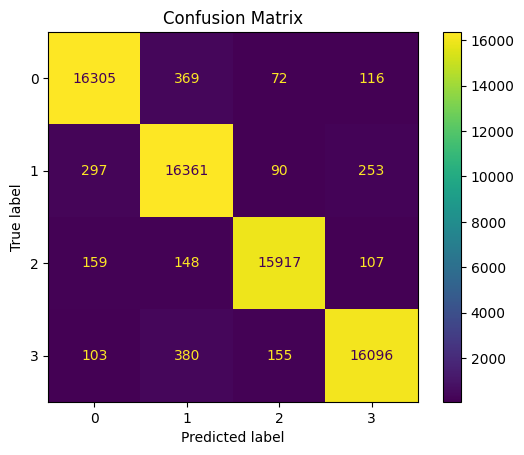

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
feature_importances = best_model.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.24266815 0.36775729 0.38957457]


FINAL

In [ ]:
import joblib
joblib.dump(best_model, 'Oversample_WESAD_All_4_labels.pkl')

['Oversample_WESAD_All_4_labels.pkl']

In [ ]:
X_test

,ACC_1,EDA,TEMP
166873,1.176146,-4.931567,15.081163
267594,-0.234150,-5.252695,15.391453
174909,-1.067565,-5.319699,15.232766
278040,1.887260,-5.243671,15.851608
65075,-1.855444,-2.140755,15.155504
...,...,...,...
48615,-0.508070,-5.254016,15.811058
159706,-0.957195,-5.223623,13.053675
214213,0.110178,-5.042972,16.095413
294002,0.256633,-5.338182,16.244864


In [ ]:
loaded_model = joblib.load('Oversample_WESAD_All_4_labels.pkl')
new_data_predictions = loaded_model.predict(X_test)
predictions_df = pd.DataFrame(new_data_predictions, columns=['predictions'])
predictions_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,predictions
0,3.0
1,1.0
2,0.0
3,2.0
4,0.0
...,...
66923,0.0
66924,3.0
66925,1.0
66926,2.0


In [ ]:
y_test

166873    3.0
267594    1.0
174909    0.0
278040    2.0
65075     0.0
         ... 
48615     0.0
159706    3.0
214213    1.0
294002    2.0
103804    1.0
Name: labels, Length: 66928, dtype: float64

In [ ]:
traget_df = y_test.reset_index(drop=True)

In [ ]:
aligned_df = pd.concat([predictions_df, traget_df], axis=1)

aligned_df

,predictions,labels
0,3.0,3.0
1,1.0,1.0
2,0.0,0.0
3,2.0,2.0
4,0.0,0.0
...,...,...
66923,0.0,0.0
66924,3.0,3.0
66925,1.0,1.0
66926,2.0,2.0


In [ ]:
same_values = (aligned_df['predictions'] == aligned_df['labels']).sum()
different_values = (aligned_df['predictions'] != aligned_df['labels']).sum()

print("Number of rows with the same values:", same_values)
print("Number of rows with different values:", different_values)

Number of rows with the same values: 64679
Number of rows with different values: 2249
